In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('adult_cleaned_final.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
X = data.drop('income', axis=1)

In [5]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States


In [4]:
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [7]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [7]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
initial_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf'))
])

In [10]:
initial_clf.fit(X_train, y_train)
y_pred_initial = initial_clf.predict(X_test)
print("Inicijalna preciznost:", accuracy_score(y_test, y_pred_initial))

Inicijalna preciznost: 0.8453721075672295


In [14]:
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
}

In [15]:
grid_search = GridSearchCV(initial_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'educational-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'gender',
                                                                          'native-country'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1]},
             scoring='accuracy')

In [16]:
best_clf_from_grid = grid_search.best_estimator_
y_pred_grid = best_clf_from_grid.predict(X_test)

In [17]:
print("Najbolji parametri iz Grid Search-a:", grid_search.best_params_)

Najbolji parametri iz Grid Search-a: {'classifier__C': 1, 'classifier__gamma': 'scale'}


In [18]:
print("Preciznost nakon Grid Search-a:", accuracy_score(y_test, y_pred_grid))

Preciznost nakon Grid Search-a: 0.8453721075672295


In [19]:
param_dist = {
    'classifier__C': uniform(0.1, 100),
    'classifier__gamma': ['scale', 'auto'] + list(uniform(0.001, 1).rvs(10))
}

In [20]:
random_search = RandomizedSearchCV(initial_clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'fnlwgt',
                                                                                'educational-num',
                                                                                'capital-gain',
                                                                                'capital-loss',
                                                                                'hours-per-week']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
                                                                                'race',
                                                                                'gender',
                                                                                'native-count...
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000240D5315EA0>,
                                        'classifier__gamma': ['scale', 'auto',
                                                              0.9461213677492307,
                                                              0.4322159295114205,
                                                              0.9686072671886793,
                                                              0.9501607673278877,
                                                              0.03529446368361289,
                                                              0.5451954478397264,
                                                              0.9107944482037599,
                                                              0.7774523207520188,
                                                              0.06450025916751723,
                                                              0.03620840995771679]},
                   scoring='accuracy')

In [21]:
best_clf_from_random = random_search.best_estimator_
y_pred_random = best_clf_from_random.predict(X_test)

In [22]:
print("Najbolji parametri iz Randomized Search-a:", random_search.best_params_)

Najbolji parametri iz Randomized Search-a: {'classifier__C': 1.5227581792019662, 'classifier__gamma': 0.06450025916751723}


In [23]:
print("Preciznost nakon Randomized Search-a:", accuracy_score(y_test, y_pred_random))

Preciznost nakon Randomized Search-a: 0.8469355847404628


In [90]:
initial_best = [1.5227581792019662, 0.06450025916751723]

In [105]:
print(f"PSO najbolje parametre: C = {best_params_pso[0]}, gamma = {best_params_pso[1]}")
print(f"PSO najbolji rezultat: {best_score_pso}")

PSO najbolje parametre: C = 1.971300576029094, gamma = 0.07209545188564022
PSO najbolji rezultat: 0.8492808005003127


In [ ]:
print(f"GA najbolje parametre: C = {best_params_ga[0]}, gamma = {best_params_ga[1]}")
print(f"GA najbolji rezultat: {best_score_ga}")

GA najbolje parametre: C = 2.096757282103435, gamma = 0.07014234643166466
GA najbolji rezultat: 0.848968105065666


In [115]:
print(f"BAT najbolje parametre: C = {best_params_bat[0]}, gamma = {best_params_bat[1]}")
print(f"BAT najbolji rezultat: {best_score_bat}")

BAT najbolje parametre: C = 2.0743086463321316, gamma = 0.054500259167517225
BAT najbolji rezultat: 0.848968105065666


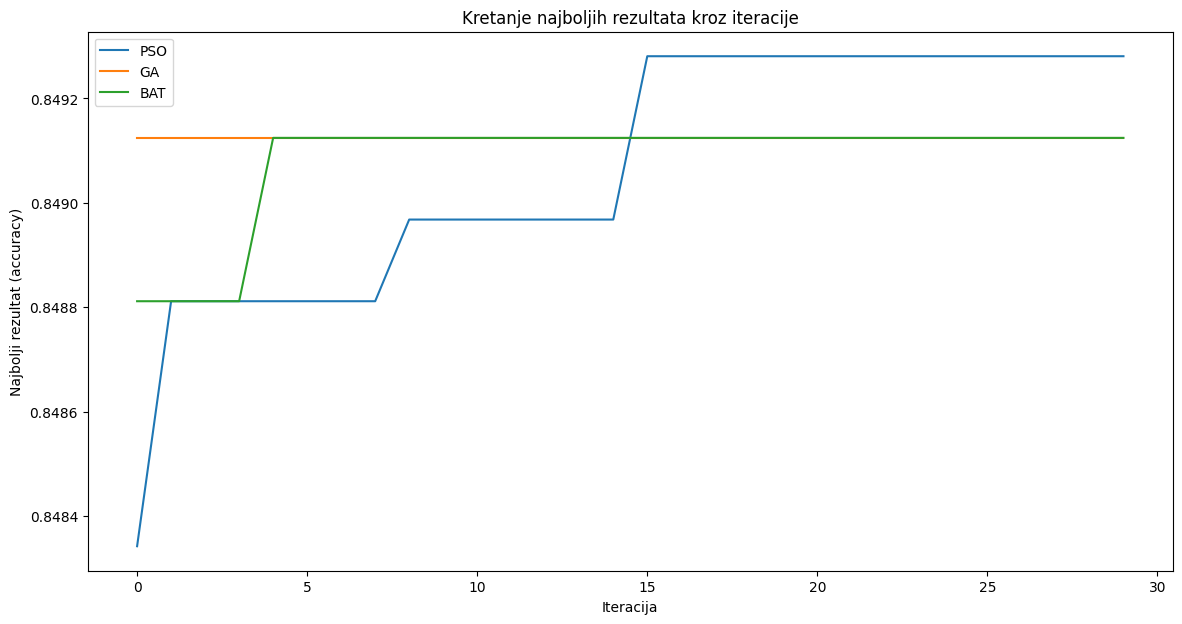

In [72]:
plt.figure(figsize=(14, 7))
plt.plot(history_pso, label='PSO')
plt.plot(history_ga, label='GA')
plt.plot(history_bat, label='BAT')
plt.xlabel('Iteracija')
plt.ylabel('Najbolji rezultat (accuracy)')
plt.title('Kretanje najboljih rezultata kroz iteracije')
plt.legend()
plt.show()

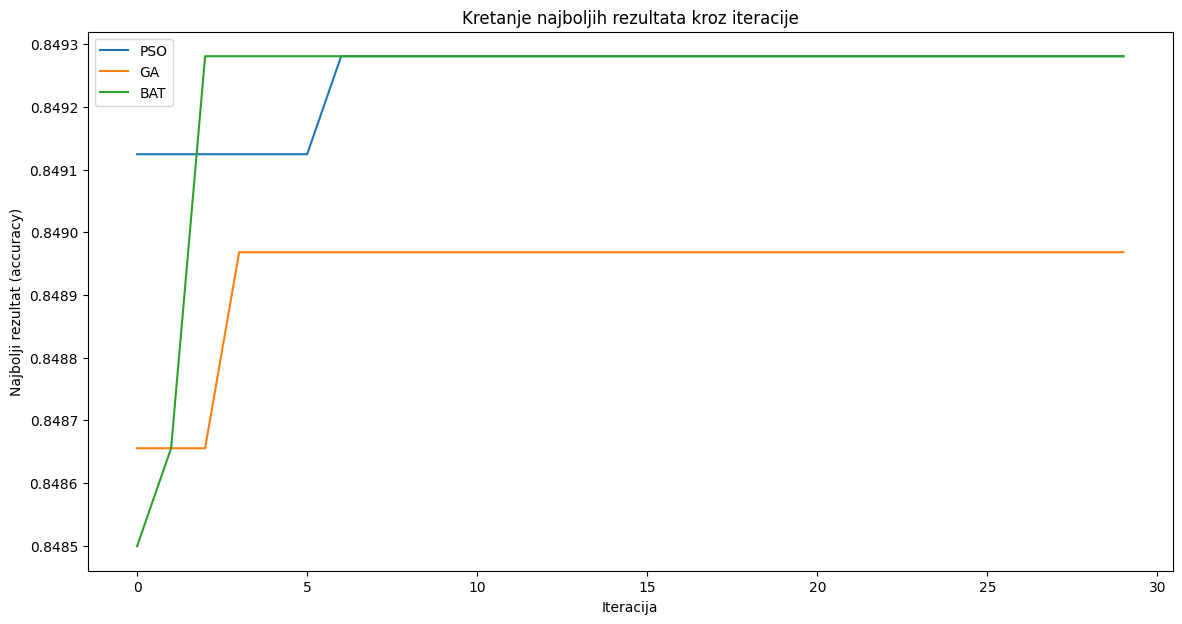

In [106]:
plt.figure(figsize=(14, 7))
plt.plot(history_pso, label='PSO')
plt.plot(history_ga, label='GA')
plt.plot(history_bat, label='BAT')
plt.xlabel('Iteracija')
plt.ylabel('Najbolji rezultat (accuracy)')
plt.title('Kretanje najboljih rezultata kroz iteracije')
plt.legend()
plt.show()

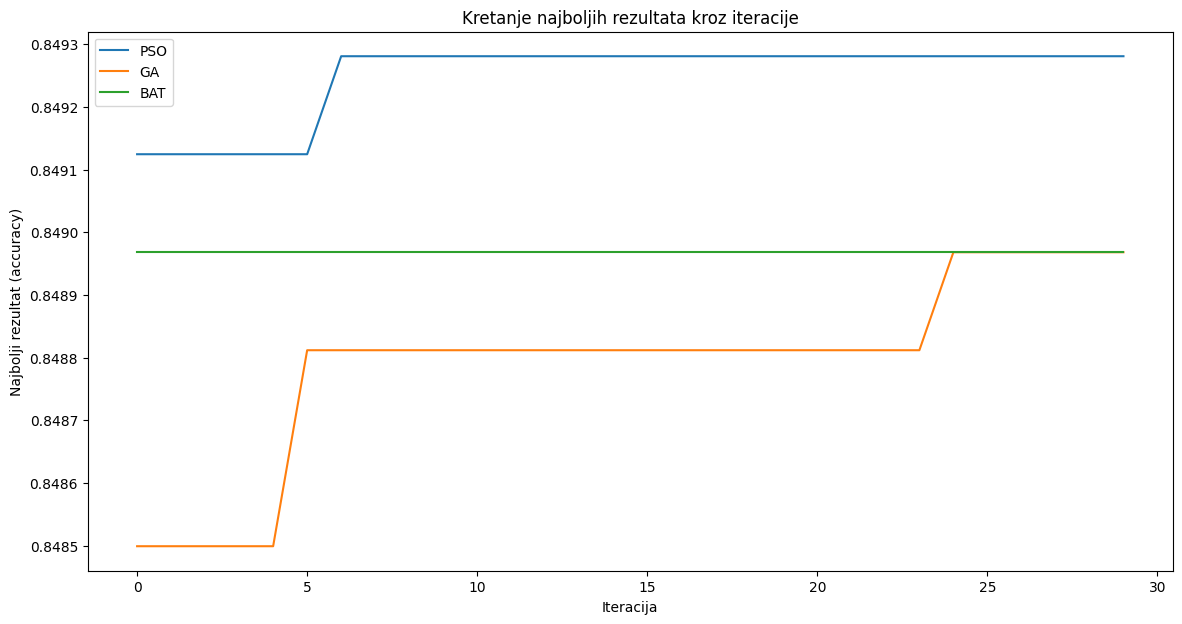

In [116]:
plt.figure(figsize=(14, 7))
plt.plot(history_pso, label='PSO')
plt.plot(history_ga, label='GA')
plt.plot(history_bat, label='BAT')
plt.xlabel('Iteracija')
plt.ylabel('Najbolji rezultat (accuracy)')
plt.title('Kretanje najboljih rezultata kroz iteracije')
plt.legend()
plt.show()